In [1]:
%matplotlib inline

In [28]:
import astropy.io.fits as py
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

In [5]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 25

In [19]:
# load data:
wave, model = np.load("WASP-121b.npy")
data = np.loadtxt(fname= "SNR_WASP-121")
instrument_wave = data[:,0]
snr = data[:,1]

0.9827212026561358


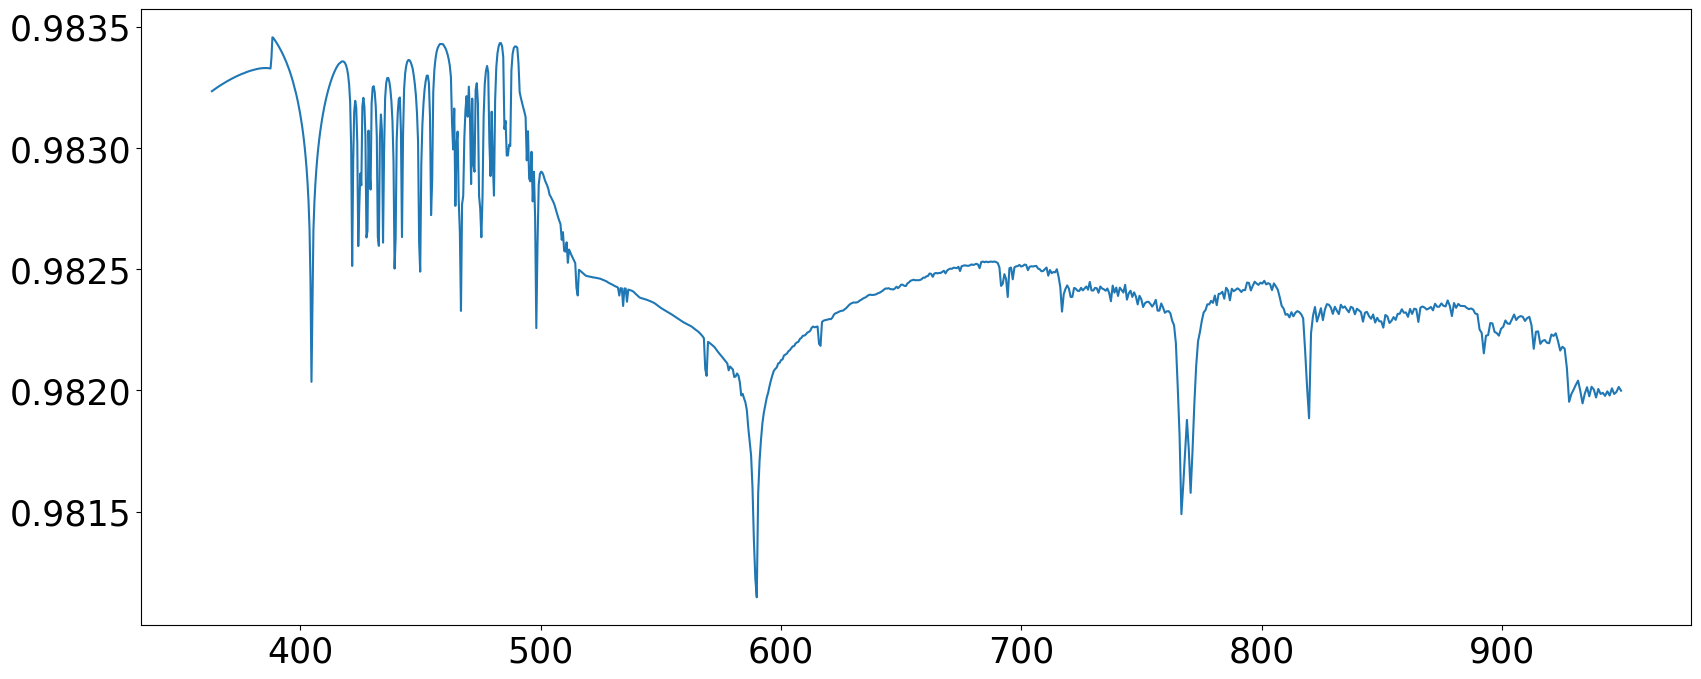

In [43]:
# Star Radious
r_star = 1.458  # Solar radious
star_radius = r_star*const.R_sun.value

# Planet Radius
R_pl = 1.865*const.R_jup.value

# Transit drop

transit_factor = 1 - (R_pl**2)/(star_radius**2)
print(transit_factor)

transit_factor = 1 - ((model*const.R_jup.value)**2)/(star_radius**2)
plt.plot(wave, transit_factor)

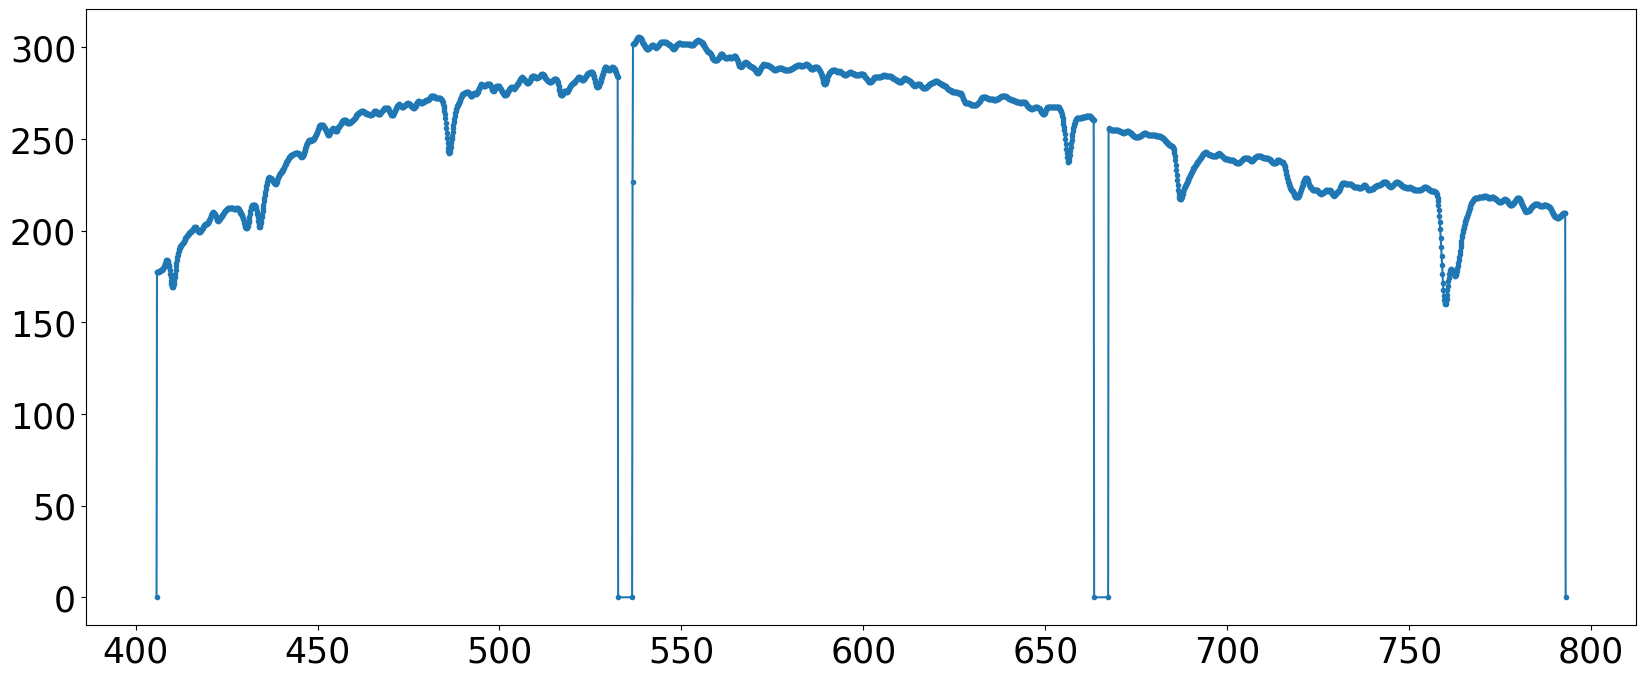

In [46]:
plt.plot(instrument_wave, snr, '.-')

In [49]:
# Interpolating

from scipy.interpolate import interp1d

# Create an interpolation function
f = interp1d(wave, transit_factor, kind='linear')

# Use this function to interpolate
interpolated_transit_factor = f(instrument_wave)

/var/folders/rb/x7czqcn50038tc9lzxkw7z4h0000gn/T/ipykernel_39500/1725343563.py:3: RuntimeWarning: divide by zero encountered in divide
  noise = np.random.normal(0, 1/snr, size=np.size(snr))


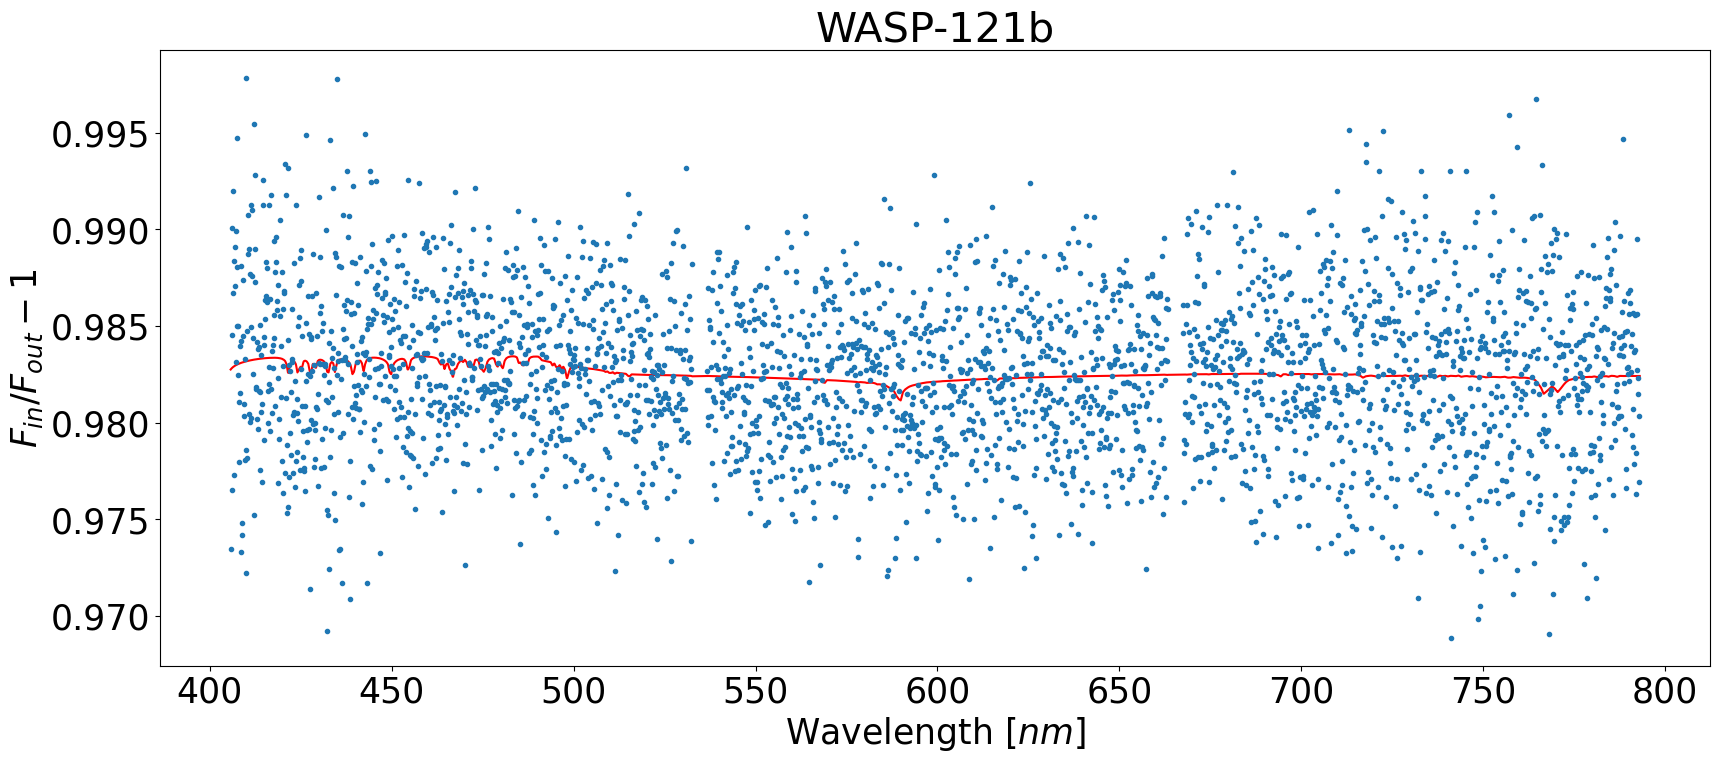

In [72]:
plt.plot(instrument_wave, interpolated_transit_factor, 'r-')

noise = np.random.normal(0, 1/snr, size=np.size(snr))
#plt.plot(instrument_wave, noise )
plt.plot(instrument_wave, interpolated_transit_factor+noise, '.')

plt.xlabel(r"Wavelength $[nm]$")
#plt.ylabel(r"$F_{in}/F_{out} -1$ [%]")
plt.ylabel(r"$F_{in}/F_{out} -1$")
plt.title("WASP-121b")

np.save("WASP-121b_TS", (instrument_wave, interpolated_transit_factor+noise,))
plt.savefig('WASP-121 b_TS.png')